# File Explanation
This file analysis the data gathered in the simulations and builds a regression model for each embedding and dataset combination.

# Imports

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
import os
import sklearn

import numpy as np
from sklearn.linear_model import LinearRegression

# Data Loading
**WARNING** This assumes that there is only one epoch used.

In [65]:
root = r"multirun\2026-01-10\22-36-18"
# Go through each run and collect results into a single df
df = pd.DataFrame()
dirs = [
    os.path.join(root, d)
    for d in os.listdir(root)
    if os.path.isdir(os.path.join(root, d))
]

for d in dirs:
    # Load config
    with open(os.path.join(d, ".hydra", "config.yaml"), "r") as f:
        config = yaml.safe_load(f)

    # Load results
    results_fp = os.path.join(d, "results.csv")
    temp_df = pd.read_csv(results_fp)
    temp_df = temp_df[["epoch", "batch", "val_loss", "val_acc"]]

    temp_df = temp_df.dropna()

    # Add config columns to results
    for k, v in config["training"].items():
        if k in ["image_width", "batch_size"]:
            temp_df[k] = v
    temp_df["embedding"] = config["embedding"]
    temp_df["dataset"] = config["dataset"]["name"]

    # Append to df
    df = pd.concat([df, temp_df], ignore_index=True)
df.head()

C:\Users\agent\AppData\Local\Temp\ipykernel_22208\3898977116.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp_df], ignore_index=True)
C:\Users\agent\AppData\Local\Temp\ipykernel_22208\3898977116.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp_df], ignore_index=True)
C:\Users\agent\AppData\Local\Temp\ipykernel_22208\3898977116.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a fu

,epoch,batch,val_loss,val_acc,batch_size,image_width,embedding,dataset
0,0,103,0.700696,0.530405,100,2,FRQI,mnist
1,0,103,0.535969,0.832857,100,4,FRQI,mnist
2,0,103,0.435435,0.923143,100,4,ZZFeatureMap,mnist
3,0,103,0.420154,0.927214,100,6,ZZFeatureMap,mnist
4,0,103,0.384654,0.974738,100,8,ZZFeatureMap,mnist


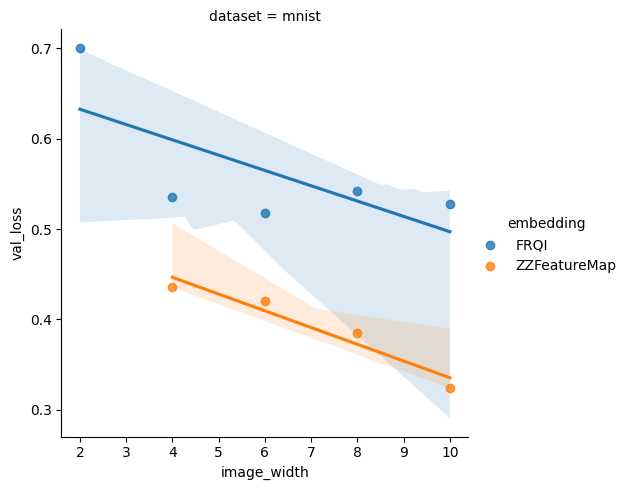

In [66]:
sns.lmplot(data=df, x="image_width", y="val_loss", hue="embedding", col="dataset")
# plt.xlim(0, 32)
# plt.ylim(0)


(0.0, 1.0)

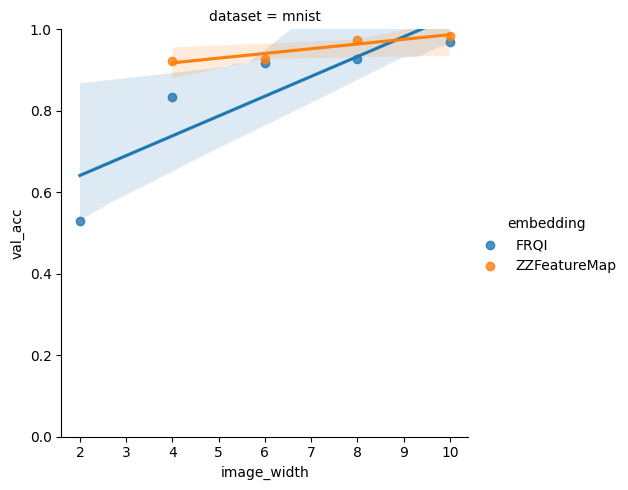

In [67]:
sns.lmplot(data=df, x="image_width", y="val_acc", hue="embedding", col="dataset")
plt.ylim(0, 1)

<Axes: xlabel='image_width', ylabel='val_loss'>

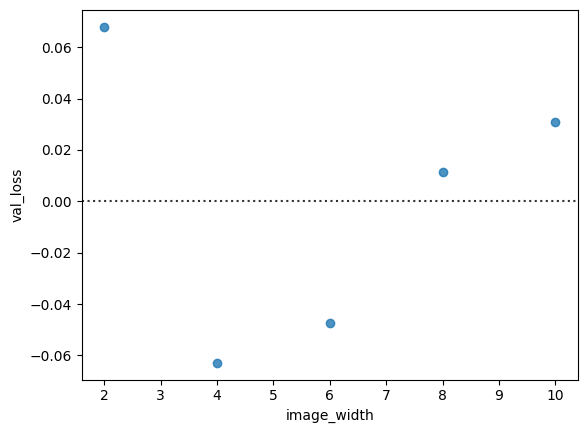

In [68]:
# Residual plot to check wether a linear model is appropriate
# TODO has later to be done per embedding and dataset
sns.residplot(
    data=df[(df["embedding"] == "FRQI") & (df["dataset"] == "mnist")],
    x="image_width",
    y="val_loss",
)